In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import ipywidgets as wgt
from IPython.display import clear_output
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

# Data used
Data was scraped from homegate.ch on 5th of February, 2020. A total of 3875 listings were scraped, with details of currency, pricing, number of rooms, apartment size and address. Location was extracted from the address, and appropriate regions, cantons and languages were input by hand. The only canton missing is Geneva canton. Data shows apartments with a minimum of one bedroom to a maximum of two bedrooms.

In [2]:
data = pd.read_csv('2_bed_csv.csv')

In [3]:
data.head(30)

,Currency,Pricing,Number of rooms,Appt Size,Address,Place,Kanton,Region,Language,Secondary
0,CHF,780,1.0,24,"Maienzugstrasse 10-12, 5000 Aarau",Aarau,Aargau,Middle-North,German,None
1,CHF,980,1.5,38,"Buchserstrasse 34, 5000 Aarau",Aarau,Aargau,Middle-North,German,None
2,CHF,995,1.5,0,"DAMMWEG 8a, 5000 Aarau",Aarau,Aargau,Middle-North,German,None
3,CHF,1090,1.0,25,"Hallwylstrasse 4, 5000 Aarau",Aarau,Aargau,Middle-North,German,None
4,CHF,1290,1.5,34,"Vordere Vorstadt 17/19, 5000 Aarau",Aarau,Aargau,Middle-North,German,None
5,CHF,1370,2.0,79,"Ziegelrain 1, 5000 Aarau",Aarau,Aargau,Middle-North,German,None
6,CHF,1665,1.0,69,"Tellistrasse 90, 5000 Aarau",Aarau,Aargau,Middle-North,German,None
7,CHF,980,1.5,38,"Buchserstrasse 34, 5000 Aarau",Aarau,Aargau,Middle-North,German,None
8,CHF,995,1.5,0,"DAMMWEG 8a, 5000 Aarau",Aarau,Aargau,Middle-North,German,None
9,CHF,1090,1.0,25,"Hallwylstrasse 4, 5000 Aarau",Aarau,Aargau,Middle-North,German,None


# Average price per number of rooms

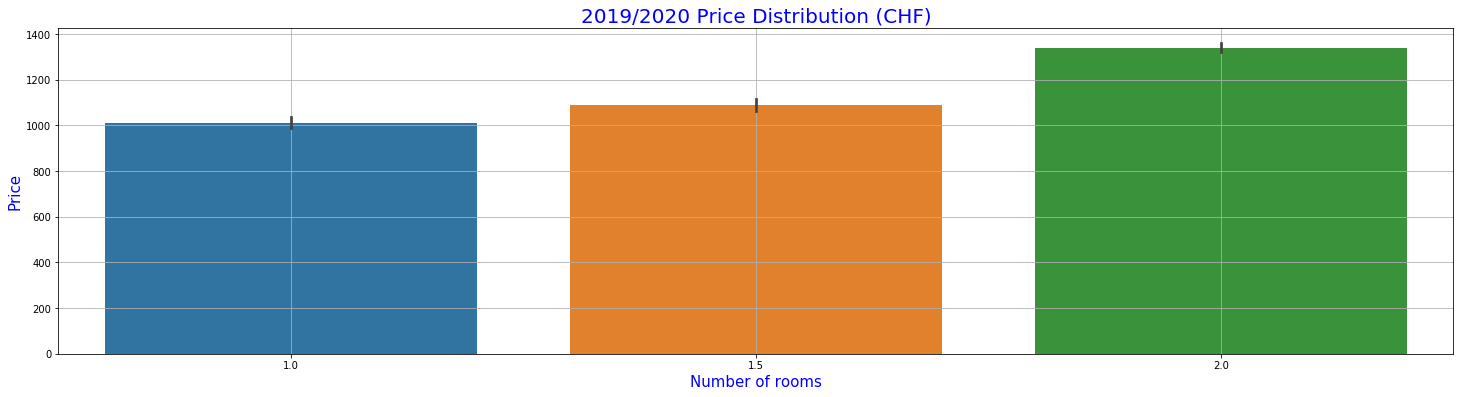

In [4]:
f, ax1 = plt.subplots(figsize =(25,6))
sns.barplot(x="Number of rooms", y="Pricing", data=data)

plt.xlabel('Number of rooms', fontsize = 15, color='blue')
plt.ylabel('Price', fontsize = 15, color='blue')
plt.title('2019/2020 Price Distribution (CHF)', fontsize = 20, color='blue')

plt.grid()
plt.show()

## Correlation between apartment size and pricing

Text(0.5, 1, '2019/2020 Correlation between prices and apartment sizes (CHF)')

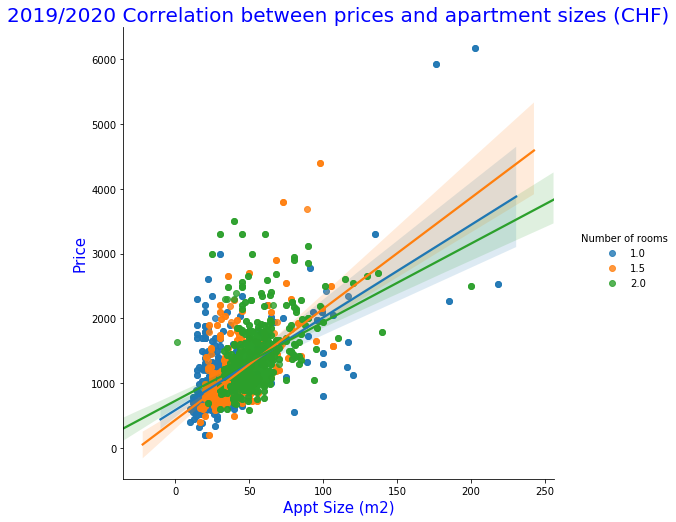

In [6]:
appt_size = pd.DataFrame({
    "size": data["Appt Size"],
    "price": data["Pricing"],
    "Number of rooms": data["Number of rooms"]
})

filter = appt_size["size"]>0
appt_size.where(filter, inplace = True)
appt_size.dropna()

sns.lmplot(x="size", y="price", hue="Number of rooms",data=appt_size, height=7)

plt.xlabel('Appt Size (m2)', fontsize = 15, color='blue')
plt.ylabel('Price', fontsize = 15, color='blue')
plt.title('2019/2020 Correlation between prices and apartment sizes (CHF)', fontsize = 20, color='blue')

# Basic data
Data showing mean, median, maximum/minimum of collected pricing data, with a separate query for the cheapest and the most expensive listing.

In [7]:
data.describe()

,Pricing,Number of rooms,Appt Size
count,3875.000000,3875.000000,3875.000000
mean,1168.192516,1.542710,33.205677
std,469.833621,0.431462,25.497533
min,100.000000,1.000000,0.000000
25%,860.000000,1.000000,15.000000
50%,1090.000000,1.500000,34.000000
75%,1370.000000,2.000000,50.000000
max,6175.000000,2.000000,218.000000


In [8]:
data.loc[data['Pricing'] == data.max()["Pricing"]]

,Currency,Pricing,Number of rooms,Appt Size,Address,Place,Kanton,Region,Language,Secondary
3579,CHF,6175,1.0,203,"Seestrasse 457b, 8002 Zürich",Zürich,Zürich,Middle-North,German,None
3599,CHF,6175,1.0,203,"Seestrasse 457b, 8002 Zürich",Zürich,Zürich,Middle-North,German,None


In [9]:
data.loc[data['Pricing'] == data.min()["Pricing"]]

,Currency,Pricing,Number of rooms,Appt Size,Address,Place,Kanton,Region,Language,Secondary
2859,CHF,100,1.0,0,"Ruelle 5, 1429 Giez",Giez,Vaud,South-West,French,None
2860,CHF,100,1.0,0,"Ruelle 5, 1429 Giez",Giez,Vaud,South-West,French,None


## Average price per Canton

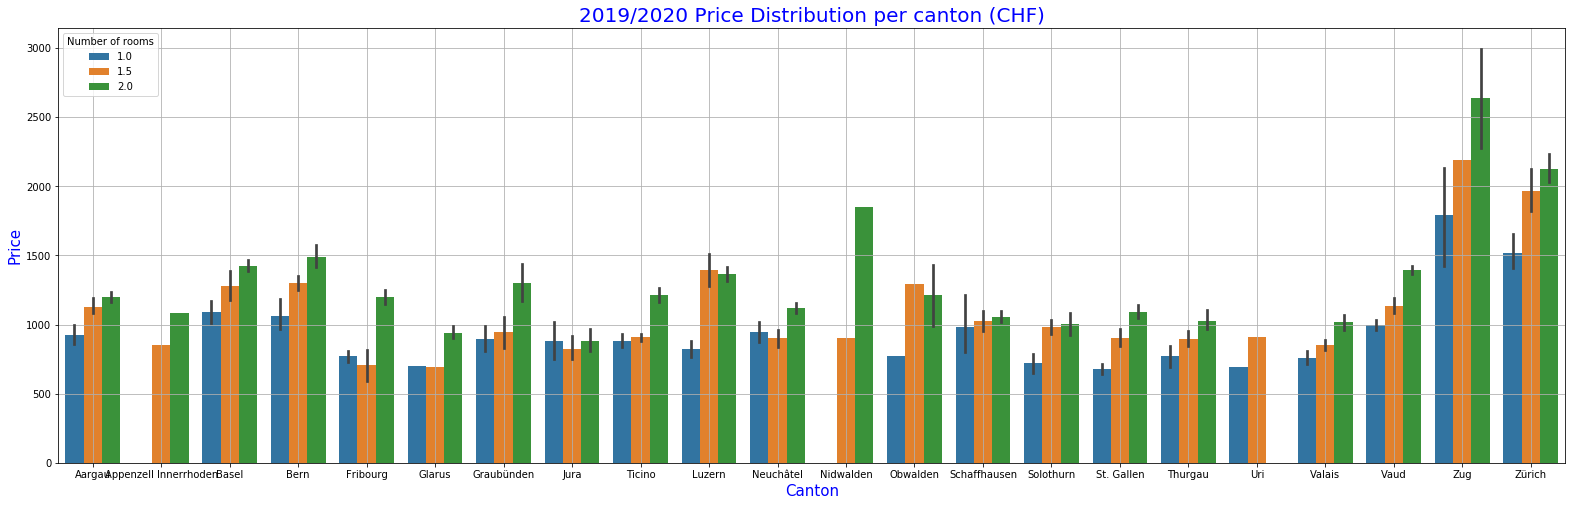

In [10]:
appt_loc = pd.DataFrame({
    "kanton": data["Kanton"],
    "price": data["Pricing"],
    "Number of rooms": data["Number of rooms"]
})

f, ax1 = plt.subplots(figsize =(27,8))
sns.barplot(x="kanton", y="price", hue="Number of rooms", data=appt_loc)

plt.xlabel('Canton', fontsize = 15, color='blue')
plt.ylabel('Price', fontsize = 15, color='blue')
plt.title('2019/2020 Price Distribution per canton (CHF)', fontsize = 20, color='blue')

plt.grid()

# Price breakdown per languages spoken
None of the regions speak all three languages. Histograms below show both cantons with only primary languages and the ones with secondary languages.

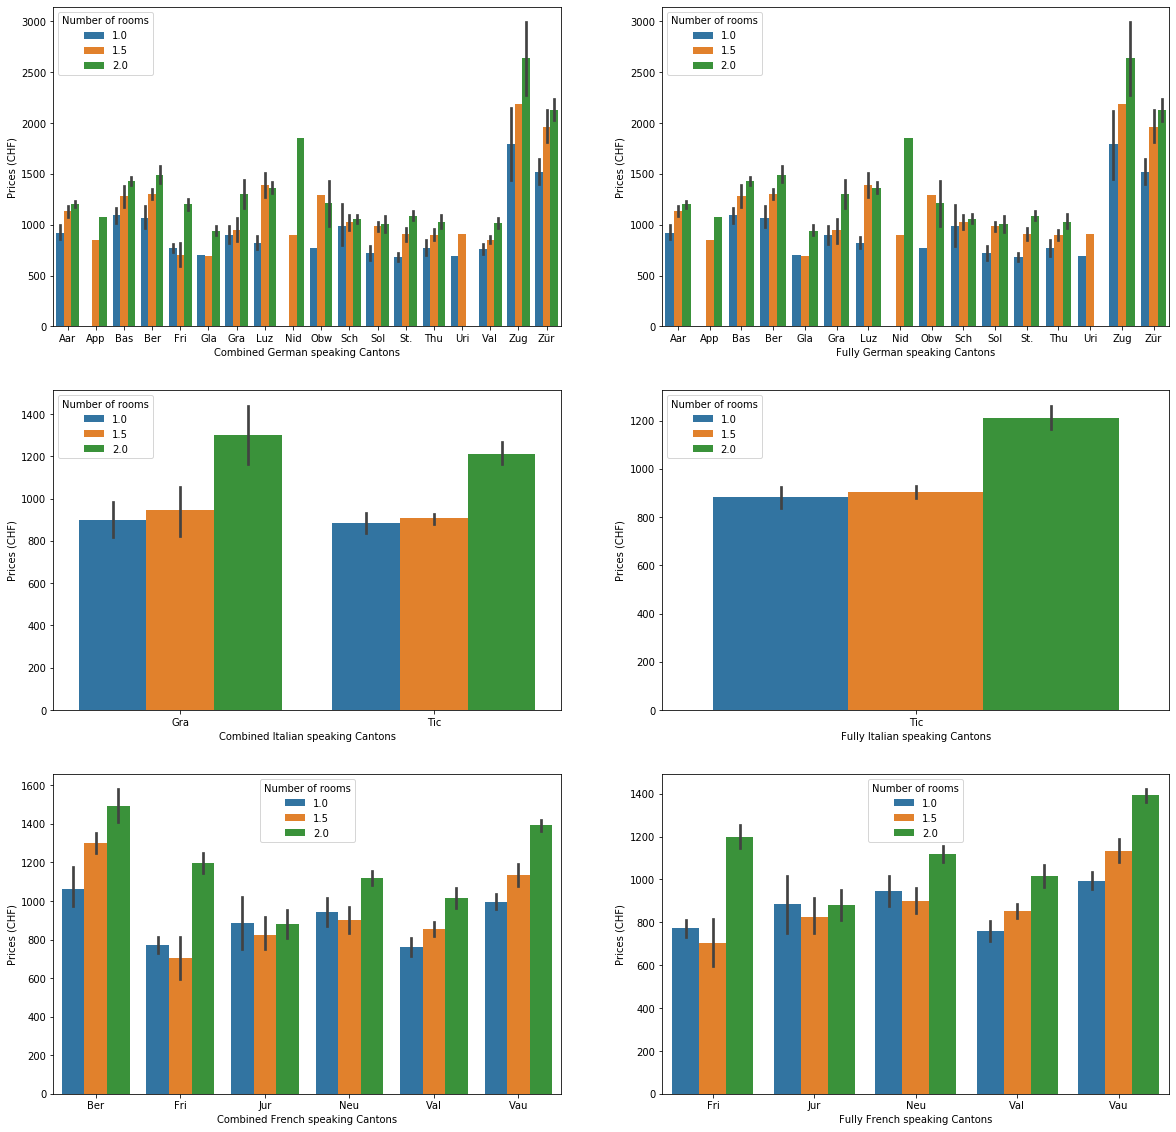

In [11]:
short = data.copy()
short["Shortened"] = short.Kanton.str[0:3]

appt_loc_lang = [
    short[(short["Language"] == "German") | (short["Secondary"] == "German")], 
    short[(short["Language"] == "German")],
    short[(short["Language"] == "Italian") | (short["Secondary"] == "Italian")],
    short[(short["Language"] == "Italian")],
    short[(short["Language"] == "French") | (short["Secondary"] == "French")],
    short[(short["Language"] == "French")]
]
          
num = 0
fig, axes = plt.subplots(3, 2, figsize =(20,20))
l_x = ["Combined German", "Fully German", "Combined Italian", "Fully Italian", "Combined French", "Fully French"]

for i in range(3):    
    for j in range(2):
        sns.barplot(x="Shortened", y="Pricing", hue="Number of rooms", data=appt_loc_lang[num], ax=axes[i][j])
        axes[i][j].set(xlabel=l_x[num] + " speaking Cantons", ylabel='Prices (CHF)')
        num+=1       

## Price breakdown per scraped locations of chosen canton

In [20]:
optlist = list(set(list(data["Kanton"])))
w = wgt.Dropdown(
    options=optlist,
    value='Ticino',
    description='Canton:',
)

def on_change(change):  
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(w)
        c = change['new']
        short_t = data.copy()
        short_t["Shortened"] = short_t.Place.str[0:3]

        appt_c = short_t[(short_t["Kanton"]==c)]

        f, ax1 = plt.subplots(figsize =(27,8))
        sns.barplot(x="Shortened", y="Pricing", hue="Number of rooms", data=appt_c)

        plt.xlabel('Location', fontsize = 15, color='blue')
        plt.ylabel('Price', fontsize = 15, color='blue')
        plt.title('2019/2020 Price Distribution per chosen canton locations (CHF)', fontsize = 20, color='blue')

        plt.grid()
        plt.show()

w.observe(on_change)
display(w)


Dropdown(description='Canton:', index=19, options=('St. Gallen', 'Zug', 'Schaffhausen', 'Obwalden', 'Aargau', …

# Price breakdown per Regions

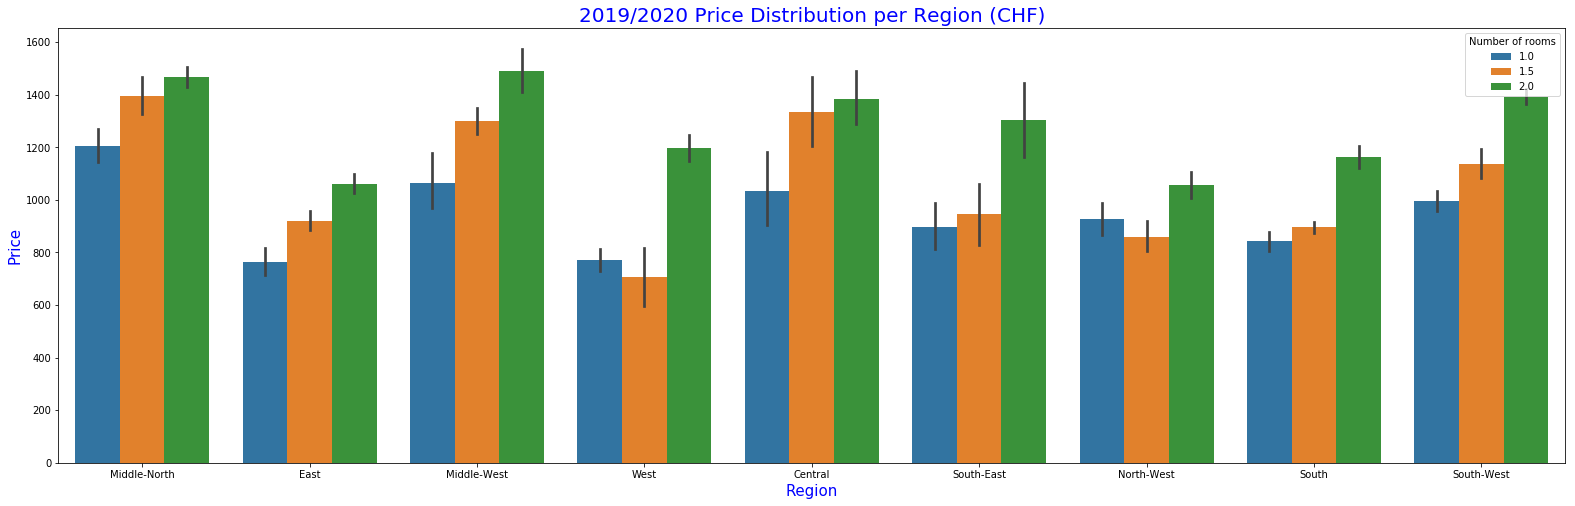

In [56]:
f, ax1 = plt.subplots(figsize =(27,8))
sns.barplot(x="Region", y="Pricing", hue="Number of rooms", data=data)

plt.xlabel('Region', fontsize = 15, color='blue')
plt.ylabel('Price', fontsize = 15, color='blue')
plt.title('2019/2020 Price Distribution per Region (CHF)', fontsize = 20, color='blue')

# Rents for apartments with less than 45 m2 of space

Median price for one-bedroom apartment is a little below 1,000 CHF, whereas the 1.5-bedroom apartment median is exactly at 1,000 CHF. The two-bedroom apartment median is around 1,250 CHF.

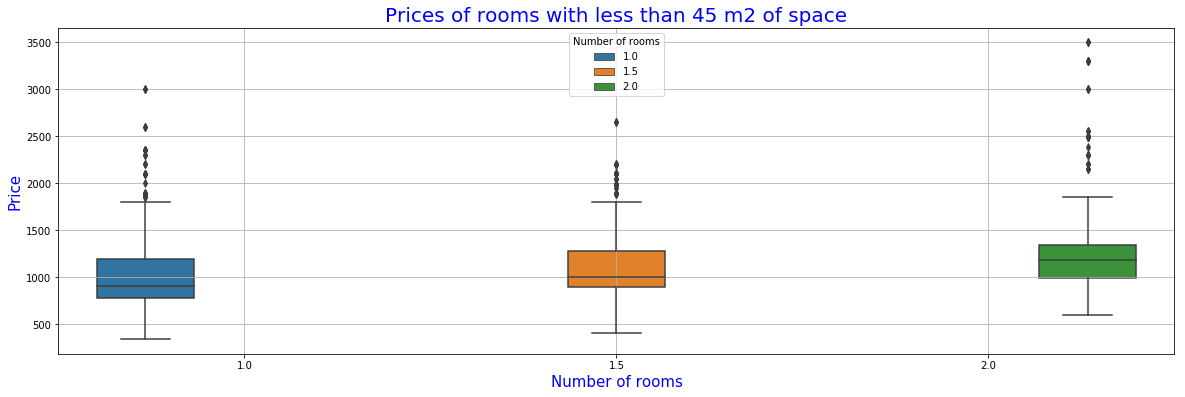

In [86]:
filt=data.copy()

filter = filt["Appt Size"] <= 45
filt.where(filter, inplace = True)
filter = filt["Appt Size"] > 0
filt.where(filter, inplace = True)
filter = filt["Language"] == "German"
filt.where(filter, inplace = True)
    
appt_size_price = filt.dropna()

f, ax1 = plt.subplots(figsize =(20,6))
sns.boxplot(x="Number of rooms", y="Pricing", hue="Number of rooms", data=appt_size_price)

plt.xlabel('Number of rooms', fontsize = 15, color='blue')
plt.ylabel('Price', fontsize = 15, color='blue')
plt.title('Rents for apartments with less than 45 m2 of space', fontsize = 20, color='blue')

plt.grid()

A 2D density plot or 2D histogram is an extension of the well known histogram. It shows the distribution of values in a data set across the range of two quantitative variables. There are two 2D density plots below, with one showing variations for 1.5-bedroom apartments, and the other one showing variations for 2-bedroom apartments.

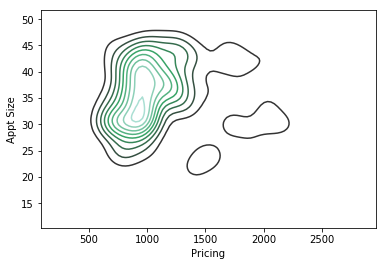

In [110]:
sns.kdeplot(appt_size_price[appt_size_price["Number of rooms"]==1.5]["Pricing"],
            appt_size_price[appt_size_price["Number of rooms"]==1.5]["Appt Size"], kind='hex')

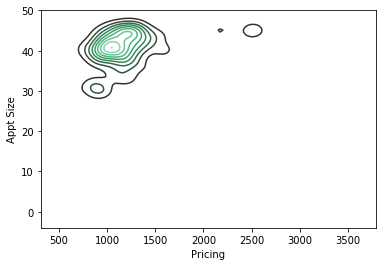

In [112]:
sns.kdeplot(appt_size_price[appt_size_price["Number of rooms"]==2.0]["Pricing"],
            appt_size_price[appt_size_price["Number of rooms"]==2.0]["Appt Size"], kind='hex')